In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv('MC_steps_timings.csv')
data_size = pd.read_csv('size_timings.csv')
data

,Iteration Number,Original,numpy_vectorised,numpy_vec_sequential,cython,cython_w_sequential,Original_w_optimisation_flag,numba,numba_numpy_sequential,numba_and_numpy,numba_omp,numba_omp_sequential
0,50,3.130508,2.197961,1.443362,1.830503,1.863775,0.589,0.467997,0.246557,0.468032,0.486781,0.270392
1,100,6.131434,5.705087,2.999371,3.746514,3.668376,0.572,0.947268,0.500594,0.944249,1.049677,0.530407
2,200,12.225410,10.682665,6.563980,7.571965,7.452022,0.571,1.904104,1.027641,1.898687,2.036396,1.131795
3,300,18.803782,15.332239,9.308882,11.149430,11.743960,0.567,3.132977,1.687762,2.903425,3.349459,1.588544
4,400,25.251567,19.876336,12.782168,14.902080,15.194260,0.569,3.785680,2.025165,3.730981,3.980253,2.145516
5,500,31.127504,23.859736,14.306240,18.976880,18.649670,0.561,5.057019,2.601121,4.980580,5.017308,2.746521
6,600,36.775282,28.348890,17.589095,22.697512,23.145910,0.593,5.733836,3.123019,5.636169,6.099480,3.209190
7,700,43.570396,32.826684,20.300337,26.077040,25.914207,0.560,6.933632,3.529080,7.300130,6.730100,3.683644
8,800,48.851926,36.866841,23.295044,29.696756,30.103099,0.583,7.665822,4.229863,7.926355,7.838548,4.327845
9,900,56.001403,41.463742,26.000124,33.552730,33.759860,0.567,8.773892,4.589784,8.960344,8.740293,4.941642


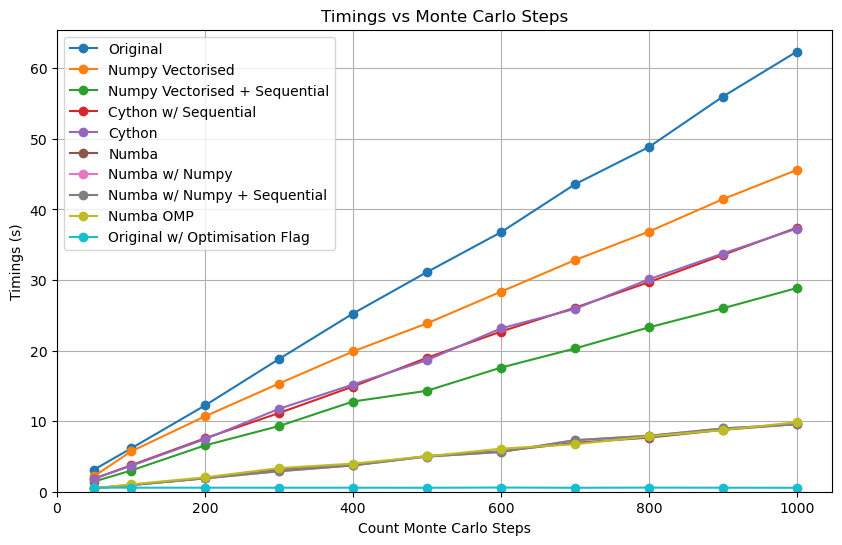

In [4]:
monte_carlo_steps = data['Iteration Number']

unchanged = data['Original']
np_vectorised = data['numpy_vectorised']
np_vec_sequential = data['numpy_vec_sequential']
cython = data['cython']
cython_w_sequential = data['cython_w_sequential']
numba = data['numba']
numba_and_numpy = data['numba_and_numpy']
numba_np_sequential = data['numba_numpy_sequential']
numba_omp = data['numba_omp']
numba_omp_sequential = data['numba_omp_sequential']
unchanged_w_optimisation_flag = data['Original_w_optimisation_flag']

# Plot
plt.figure(figsize=(10, 6))
plt.plot(monte_carlo_steps, unchanged, marker='o', label='Original')
plt.plot(monte_carlo_steps, np_vectorised, marker='o', label='Numpy Vectorised')
plt.plot(monte_carlo_steps,np_vec_sequential, marker='o', label='Numpy Vectorised + Sequential')
plt.plot(monte_carlo_steps, cython, marker='o', label='Cython w/ Sequential')
plt.plot(monte_carlo_steps, cython_w_sequential, marker='o', label='Cython')
plt.plot(monte_carlo_steps, numba, marker='o', label='Numba')
plt.plot(monte_carlo_steps, numba_and_numpy, marker='o', label='Numba w/ Numpy')
plt.plot(monte_carlo_steps, numba_and_numpy, marker='o', label='Numba w/ Numpy + Sequential')
plt.plot(monte_carlo_steps, numba_omp, marker='o', label='Numba OMP')
plt.plot(monte_carlo_steps, unchanged_w_optimisation_flag, marker='o', label='Original w/ Optimisation Flag')

plt.xlabel('Count Monte Carlo Steps')
plt.ylabel('Timings (s)')
plt.title('Timings vs Monte Carlo Steps')
plt.legend()
plt.grid(True)
plt.xlim(0)
plt.ylim(0)
plt.show()


In [17]:
data_size

,nmax_size,Original,numpy_vectorised,numpy_vec_sequential,cython,cython_w_sequential,Original_w_optimisation_flag,numba,numba_numpy_sequential,numba_and_numpy,numba_omp,numba_omp_sequential
0,50,5.733836,1.463255,1.414403,1.880941,1.828799,0.546,0.474314,0.262279,0.460708,0.515561,0.261178
1,100,18.714564,5.750221,5.698857,7.698414,7.528731,0.624,2.026370,1.023244,1.879637,0.185009,0.984578
2,200,67.818177,23.049522,22.811096,30.950331,29.913620,0.567,7.871719,3.966366,7.832590,7.394486,3.865635
3,300,149.192021,53.055946,50.953146,71.308610,68.631560,0.547,17.527107,9.045343,17.432959,17.314569,9.337794
4,400,211.637808,94.162181,92.655722,123.301690,119.764592,0.607,31.397338,15.715323,31.455949,31.206408,15.424630
5,500,314.761685,148.626194,148.182241,200.350157,193.407900,0.558,49.194305,26.103985,49.248810,48.769598,23.978765


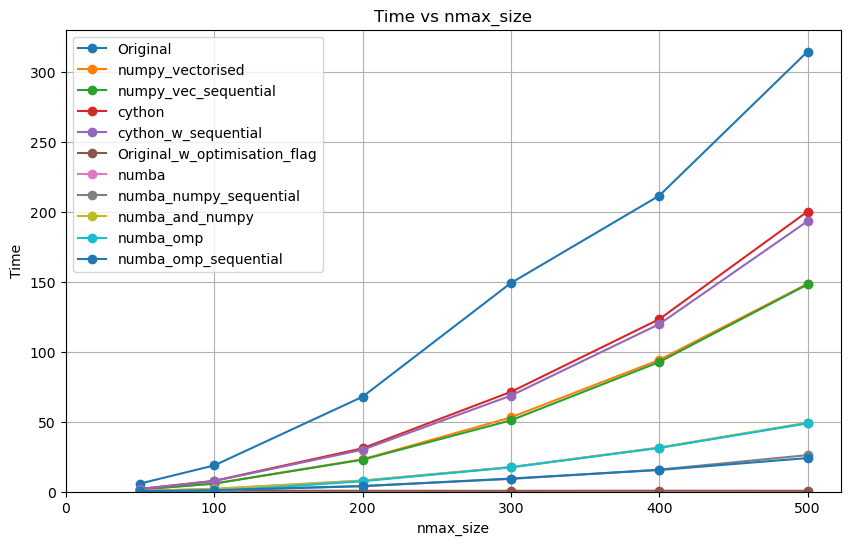

In [18]:
problem_size = data_size['nmax_size']

plt.figure(figsize=(10, 6))
for column in data_size.columns[1:]:
    plt.plot(data_size['nmax_size'], data_size[column], marker='o', label=column)

plt.xlabel('nmax_size')
plt.ylabel('Time')
plt.legend()
plt.title('Time vs nmax_size')
plt.grid(True)
plt.xlim(0)
plt.ylim(0)
plt.show()


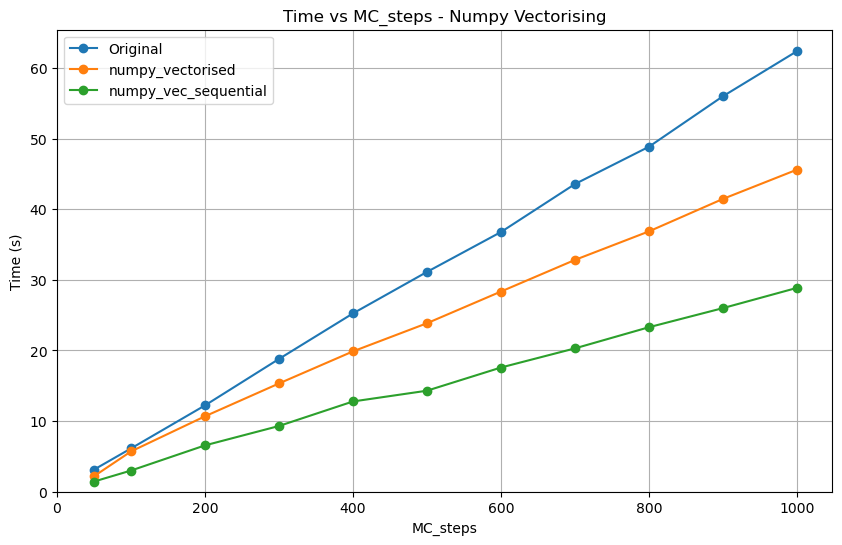

In [19]:
np_columns = ['Iteration Number', 'Original', 'numpy_vectorised', 'numpy_vec_sequential']
MC_step_np_df = data[np_columns]

plt.figure(figsize=(10, 6))
for column in MC_step_np_df.columns[1:]:
    plt.plot(MC_step_np_df['Iteration Number'], MC_step_np_df[column], marker='o', label=column)

plt.xlabel('MC_steps')
plt.ylabel('Time (s)')
plt.legend()
plt.title('Time vs MC_steps - Numpy Vectorising')
plt.grid(True)
plt.xlim(0)
plt.ylim(0)
plt.show()

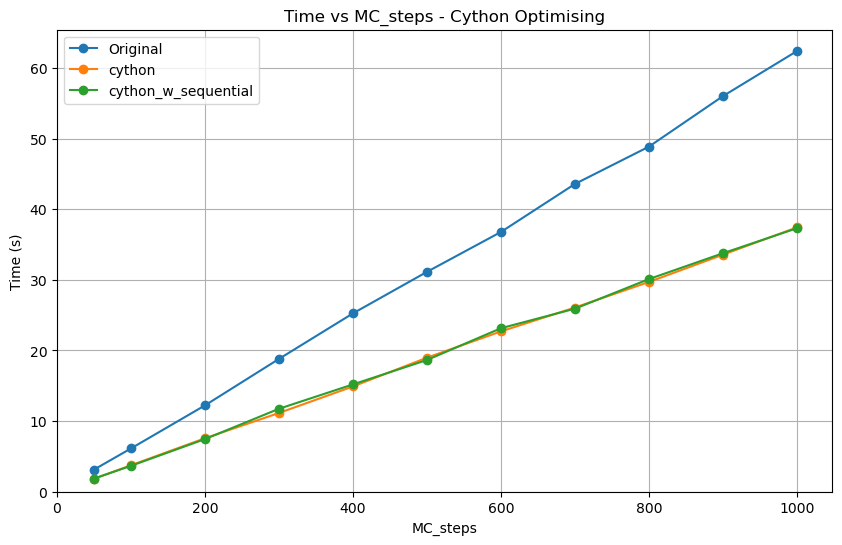

In [20]:
cython_columns = ['Iteration Number', 'Original', 'cython','cython_w_sequential']
MC_step_cython_df = data[cython_columns]
plt.figure(figsize=(10, 6))
for column in MC_step_cython_df.columns[1:]:
    plt.plot(MC_step_cython_df['Iteration Number'], MC_step_cython_df[column], marker='o', label=column)

plt.xlabel('MC_steps')
plt.ylabel('Time (s)')
plt.legend()
plt.title('Time vs MC_steps - Cython Optimising')
plt.grid(True)
plt.xlim(0)
plt.ylim(0)
plt.show()

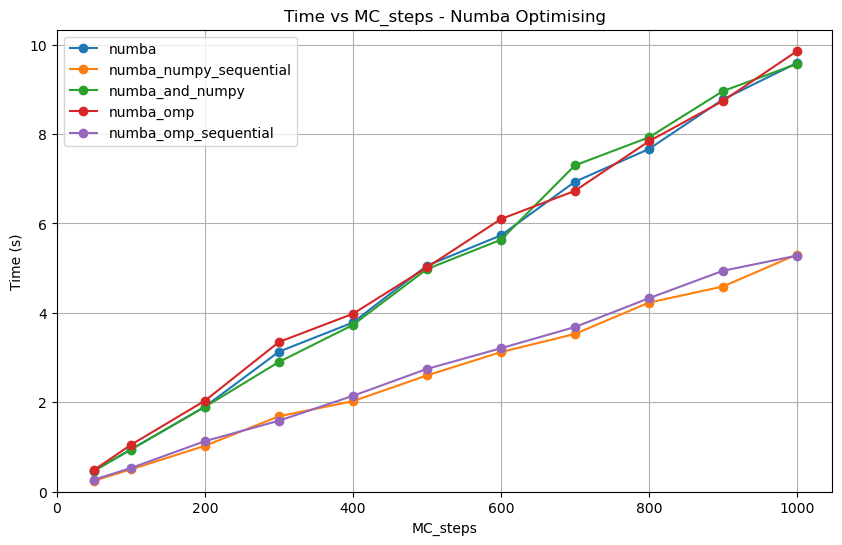

In [21]:
numba_columns = ['Iteration Number', 'numba', 'numba_numpy_sequential', 'numba_and_numpy', 'numba_omp', 'numba_omp_sequential']
MC_step_numba_df = data[numba_columns]
plt.figure(figsize=(10, 6))
for column in MC_step_numba_df.columns[1:]:
    plt.plot(MC_step_numba_df['Iteration Number'], MC_step_numba_df[column], marker='o', label=column)

plt.xlabel('MC_steps')
plt.ylabel('Time (s)')
plt.legend()
plt.title('Time vs MC_steps - Numba Optimising')
plt.grid(True)
plt.xlim(0)
plt.ylim(0)
plt.show()

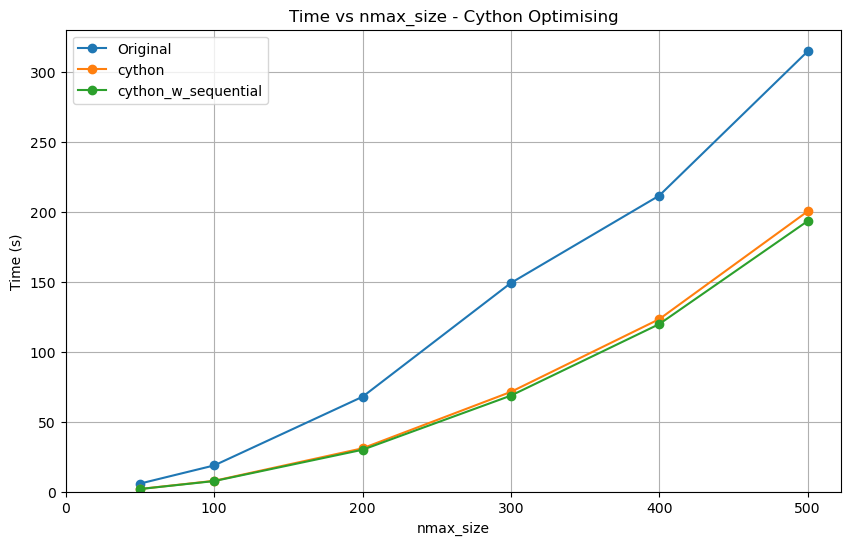

In [25]:
cython_size_columns = ['nmax_size', 'Original', 'cython','cython_w_sequential']
nmax_cython_df = data_size[cython_size_columns]

plt.figure(figsize=(10, 6))
for column in nmax_cython_df.columns[1:]:
    plt.plot(nmax_cython_df['nmax_size'], nmax_cython_df[column], marker='o', label=column)

plt.xlabel('nmax_size')
plt.ylabel('Time (s)')
plt.legend()
plt.title('Time vs nmax_size - Cython Optimising')
plt.grid(True)
plt.xlim(0)
plt.ylim(0)
plt.show()


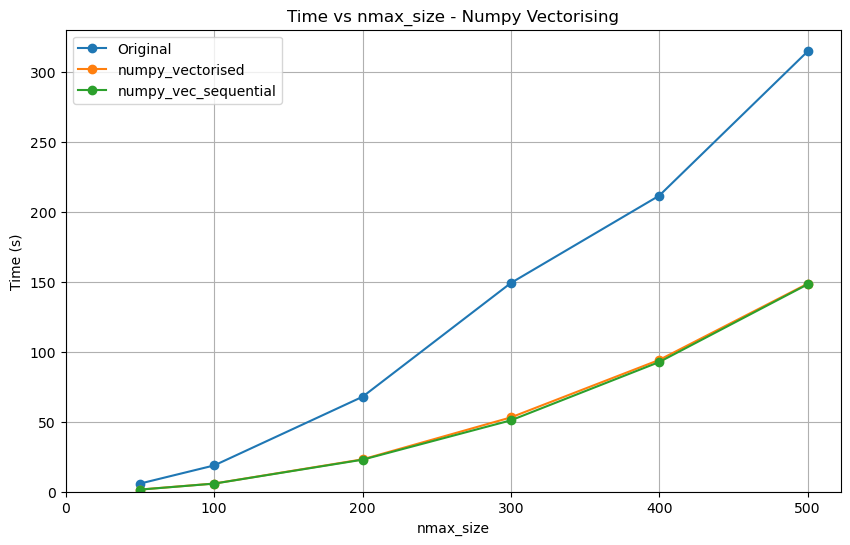

In [26]:
np_size_columns = ['nmax_size', 'Original', 'numpy_vectorised', 'numpy_vec_sequential']
nmax_np_df = data_size[np_size_columns]

plt.figure(figsize=(10, 6))
for column in nmax_np_df.columns[1:]:
    plt.plot(nmax_np_df['nmax_size'], nmax_np_df[column], marker='o', label=column)

plt.xlabel('nmax_size')
plt.ylabel('Time (s)')
plt.legend()
plt.title('Time vs nmax_size - Numpy Vectorising')
plt.grid(True)
plt.xlim(0)
plt.ylim(0)
plt.show()


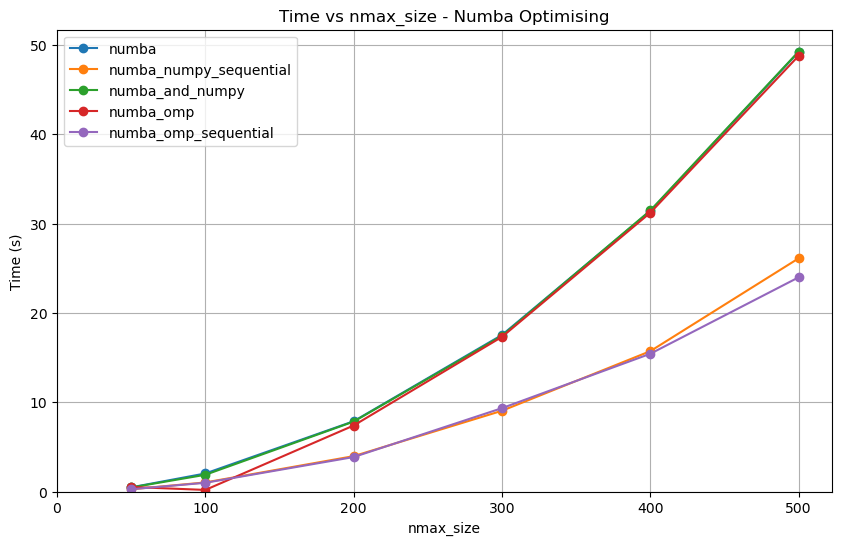

In [28]:
numba_size_columns = ['nmax_size', 'numba', 'numba_numpy_sequential', 'numba_and_numpy', 'numba_omp', 'numba_omp_sequential']
nmax_numba_df = data_size[numba_size_columns]

plt.figure(figsize=(10, 6))
for column in nmax_numba_df.columns[1:]:
    plt.plot(nmax_numba_df['nmax_size'], nmax_numba_df[column], marker='o', label=column)

plt.xlabel('nmax_size')
plt.ylabel('Time (s)')
plt.legend()
plt.title('Time vs nmax_size - Numba Optimising')
plt.grid(True)
plt.xlim(0)
plt.ylim(0)
plt.show()
